<a href="https://colab.research.google.com/github/alexzv104/artificial_Intelligence/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_13_07_15_07_%D0%94%D0%B5%D0%BD%D1%8C_2_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip -q install terra_ai
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


# **Практический материал занятия**

## Классификация отзывов автомобиля Тесла

In [ ]:
# Загружаем базу отзывов Tesla
терра_ии.загрузить_базу(база='TESLA')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/tesla.zip


In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'TESLA')

В данной базе находятся положительные и негативные отзывы об автомобилях Tesla:
['Негативный отзыв', 'Позитивный отзыв']

Пример отзыва:
Тип отзыва:  Позитивный отзыв
Отзывы:
     *  Водитель наслаждается от такого авто и вождения  Красивая машина нужно брать  Тесла топ, тащусь от 


In [ ]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = '10000'
размер_окна = '50'
шаг = '10'
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг, 
    путь_к_базе = '/content/Отзывы/')

Формирование выборки завершено


### Эксперименты

In [ ]:
# Эксперимент № 1
# Уменьшенный размер эмбеддинг-пространства. Слабая нейронка (меньше слоев, меньше нейронов)
ветвь1 = 'Эмбеддинг-2-'+ количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-2'
ветвь2 = 'Полносвязный-4 Полносвязный-2'
ветвь3 = 'Полносвязный-2'
нейронка_тесла_1 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 2.18c   Точность на обучающей выборке: 56.56%    Точность на проверочной выборке: 59.38%
Эпоха №2    Время обучения: 1.47c   Точность на обучающей выборке: 95.46%    Точность на проверочной выборке: 65.62%
Эпоха №3    Время обучения: 1.45c   Точность на обучающей выборке: 99.77%    Точность на проверочной выборке: 81.25%
Эпоха №4    Время обучения: 1.46c   Точность на обучающей выборке: 99.99%    Точность на проверочной выборке: 81.25%
Эпоха №5    Время обучения: 1.45c   Точность на обучающей выборке: 99.99%    Точность на проверочной выборке: 81.25%
Эпоха №6    Время обучения: 1.47c   Точность на обучающей выборке: 99.99%    Точность на проверочной выборке: 81.25%
Эпоха №7    Время обучения: 1.46c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.38%
Эпоха №8    Время обучения: 1.46c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 84.38%
Эпоха №9    Время обучения: 1.46c   Точность на обучающей выборк

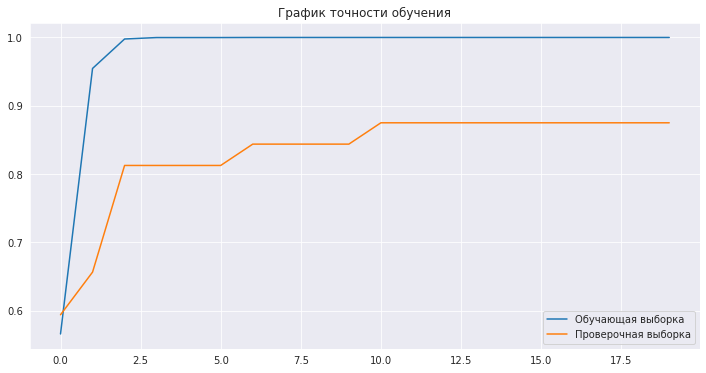

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_тесла_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Машина скоростная. По трассе идет отлично'
терра_ии.тест_модели_отзывы(нейронка_тесла_1, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  57.8 %
Позитивный отзыв   -  42.2 %

Нейросеть думает, что это: Негативный отзыв - 57.8%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_1, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  32.91 %
Позитивный отзыв   -  67.09 %

Нейросеть думает, что это: Позитивный отзыв - 67.09%


In [ ]:
# Эксперимент № 2
# Размер эмбеддинг-пространства чуть больше. Слабая нейронка.
# Больший размер пакета при обучении
ветвь1 = 'Эмбеддинг-10-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-8'
ветвь2 = 'Полносвязный-32 Полносвязный-16 Полносвязный-8'
ветвь3 = 'Полносвязный-8'
нейронка_тесла_2 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 1.74c   Точность на обучающей выборке: 57.6%     Точность на проверочной выборке: 62.5%
Эпоха №2    Время обучения: 1.05c   Точность на обучающей выборке: 90.79%    Точность на проверочной выборке: 87.5%
Эпоха №3    Время обучения: 1.13c   Точность на обучающей выборке: 99.95%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 1.06c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 1.02c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №6    Время обучения: 1.06c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №7    Время обучения: 1.01c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №8    Время обучения: 1.09c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №9    Время обучения: 1.07c   Точность на обучающей выборке:

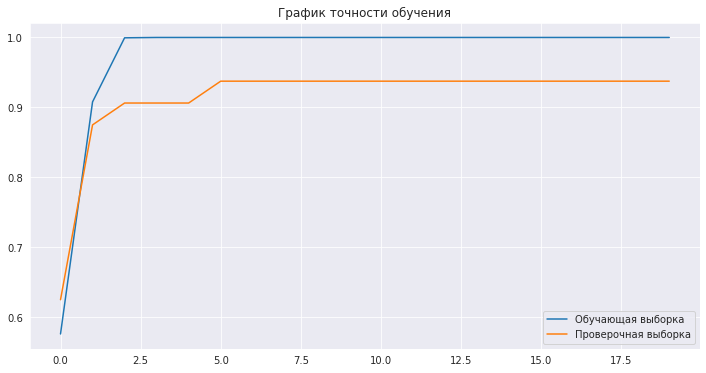

In [ ]:
# Обучаем модель
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_тесла_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Обзор не очень, зеркала маленькие, заднее стекло тоже'
терра_ии.тест_модели_отзывы(нейронка_тесла_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  35.29 %
Позитивный отзыв   -  64.71 %

Нейросеть думает, что это: Позитивный отзыв - 64.71%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_2, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  16.14 %
Позитивный отзыв   -  83.86 %

Нейросеть думает, что это: Позитивный отзыв - 83.86%


In [ ]:
# Эксперимент № 3
# Еще увеличим размер эмбеддинг-пространства. Нейронка посильнее.
ветвь1 = 'Эмбеддинг-50-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-16'
ветвь2 = 'Полносвязный-64 Полносвязный-32 Полносвязный-16'
ветвь3 = 'Полносвязный-32'
нейронка_тесла_3 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 2.56c   Точность на обучающей выборке: 59.25%    Точность на проверочной выборке: 84.38%
Эпоха №2    Время обучения: 1.8c    Точность на обучающей выборке: 99.08%    Точность на проверочной выборке: 87.5%
Эпоха №3    Время обучения: 1.8c    Точность на обучающей выборке: 99.98%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 1.91c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 1.78c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №6    Время обучения: 1.74c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №7    Время обучения: 1.75c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №8    Время обучения: 1.76c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №9    Время обучения: 1.75c   Точность на обучающей выборке

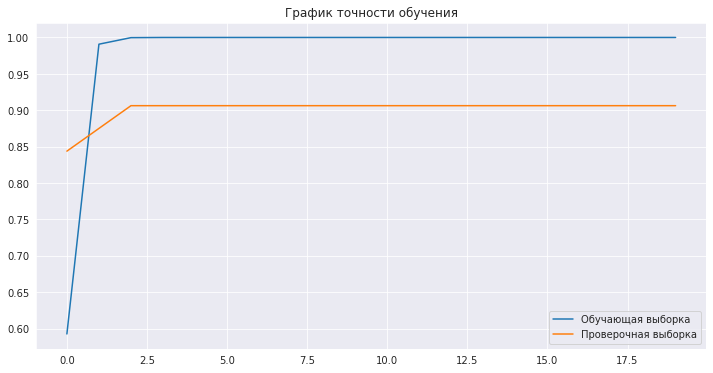

In [ ]:
# Обучаем модель
эксперимент_3 = терра_ии.обучение_модели(
    нейронка_тесла_3,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'После 170 на трассе она чувствует себя неуверенно.'
терра_ии.тест_модели_отзывы(нейронка_тесла_3, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  42.16 %
Позитивный отзыв   -  57.84 %

Нейросеть думает, что это: Позитивный отзыв - 57.84%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_3, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  26.87 %
Позитивный отзыв   -  73.13 %

Нейросеть думает, что это: Позитивный отзыв - 73.13%


In [ ]:
# Эксперимент № 4
# Более сильная нейронка
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-32'
ветвь2 = 'Полносвязный-128 Полносвязный-64 Полносвязный-32'
ветвь3 = 'Полносвязный-32'
нейронка_тесла_4 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 3.54c   Точность на обучающей выборке: 74.23%    Точность на проверочной выборке: 87.5%
Эпоха №2    Время обучения: 2.66c   Точность на обучающей выборке: 99.95%    Точность на проверочной выборке: 90.62%
Эпоха №3    Время обучения: 2.86c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 2.67c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 2.67c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №6    Время обучения: 2.67c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №7    Время обучения: 2.74c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №8    Время обучения: 2.62c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №9    Время обучения: 2.54c   Точность на обучающей выборке

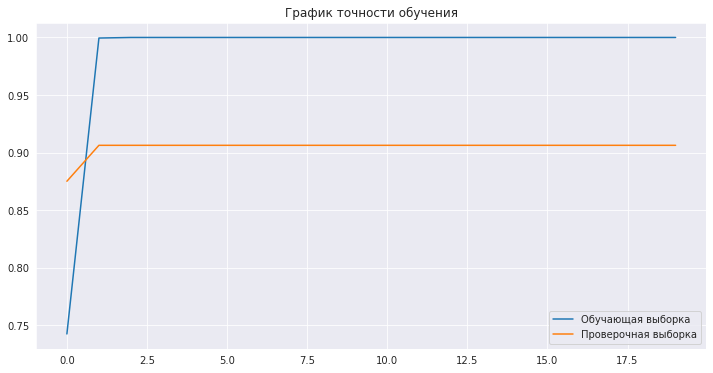

In [ ]:
# Обучаем модель
эксперимент_4 = терра_ии.обучение_модели(
    нейронка_тесла_4,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Машина мне нравится, хоть она и дорогая. Удобная в эксплуатации'
терра_ии.тест_модели_отзывы(нейронка_тесла_4, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  30.0 %
Позитивный отзыв   -  70.0 %

Нейросеть думает, что это: Позитивный отзыв - 70.0%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_4, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  30.63 %
Позитивный отзыв   -  69.37 %

Нейросеть думает, что это: Позитивный отзыв - 69.37%


In [ ]:
# Эксперимент № 5
# Еще усилим модель
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-100'
ветвь2 = 'Полносвязный-1024 Полносвязный-256 Полносвязный-64'
ветвь3 = 'Полносвязный-100'
нейронка_тесла_5 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 4.83c   Точность на обучающей выборке: 90.55%    Точность на проверочной выборке: 93.75%
Эпоха №2    Время обучения: 4.12c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №3    Время обучения: 4.14c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №4    Время обучения: 4.02c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №5    Время обучения: 3.97c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №6    Время обучения: 4.01c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №7    Время обучения: 3.98c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №8    Время обучения: 4.01c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 93.75%
Эпоха №9    Время обучения: 3.99c   Точность на обучающей выборк

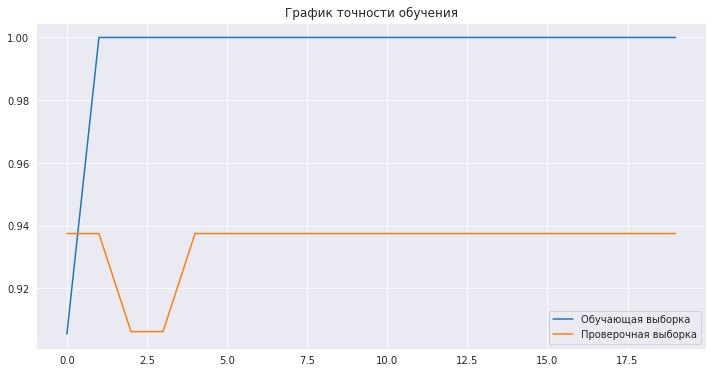

In [ ]:
# Обучаем модель
эксперимент_5 = терра_ии.обучение_модели(
    нейронка_тесла_5,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Нереально шикарная машина. Нет слов просто. Мечта!'
терра_ии.тест_модели_отзывы(нейронка_тесла_5, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  37.25 %
Позитивный отзыв   -  62.75 %

Нейросеть думает, что это: Позитивный отзыв - 62.75%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_5, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  57.34 %
Позитивный отзыв   -  42.66 %

Нейросеть думает, что это: Негативный отзыв - 57.34%


In [ ]:
# Эксперимент № 6
# Сильная модель. Еще больший размер эмбеддинг-пространства
ветвь1 = 'Эмбеддинг-300-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-200'
ветвь2 = 'Полносвязный-4096 Полносвязный-512 Полносвязный-128' 
ветвь3 = 'Полносвязный-100'

нейронка_тесла_6 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 12.92c  Точность на обучающей выборке: 93.62%    Точность на проверочной выборке: 87.5%
Эпоха №2    Время обучения: 11.43c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №3    Время обучения: 11.47c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №4    Время обучения: 11.36c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №5    Время обучения: 11.44c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №6    Время обучения: 11.48c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №7    Время обучения: 11.44c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 87.5%
Эпоха №8    Время обучения: 11.51c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 90.62%
Эпоха №9    Время обучения: 11.43c  Точность на обучающей выборке: 100.

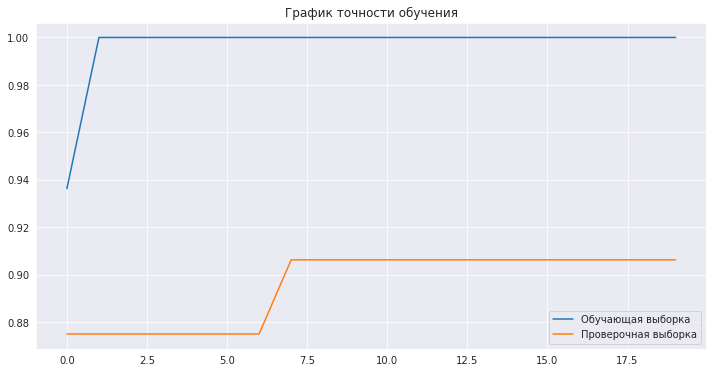

In [ ]:
# Обучаем модель
эксперимент_6 = терра_ии.обучение_модели(
    нейронка_тесла_6,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Главная проблема у Тесла это дизайн'
терра_ии.тест_модели_отзывы(нейронка_тесла_6, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  70.18 %
Позитивный отзыв   -  29.82 %

Нейросеть думает, что это: Негативный отзыв - 70.18%


In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Самая быстрая красивая мощная'
терра_ии.тест_модели_отзывы(нейронка_тесла_6, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  20.38 %
Позитивный отзыв   -  79.62 %

Нейросеть думает, что это: Позитивный отзыв - 79.62%


## Определение стоимости квартиры в Москве

In [ ]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', 
                   справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/moscow.csv
Загружена база квартир



In [ ]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

* Пример объявления: 

Количество комнат:  1
Площадь квартиры:   59.4/22.4/13.5
Метро/ЖД станция:   Крылатское м.
От станции:         5т
Дом:                15/23 М
Балкон:             Л
Санузел:            Р
Примечание:         ID в ИМЛС: 14854713 Азбука Жилья. Продается 1-комн. кв-ра площадью 59,4 кв.м на 15 этаже 23 этажного дома в ЖК "Крылатский" от компании Азбука Жилья. СОБСТВЕННОСТЬ ИЮНЬ 2018. СВОБОДНАЯ ПРОДАЖА. Квартира класса "комфорт" ОТ ИНВЕСТОРА, свободная планировка. потолки 2,9 метра. Из окон прекрасный вид на лесопарковую зону в любое время года. В комнатах окна в пол, французские балконы. Входная дверь - металлическая. Дополнительно остекленная лоджия. Оконные блоки - двухкамерный стеклопакет в ПВХ профиле. Красивые дизайнерские входные группы и межквартирные холлы, есть помещение для консьержа. 4 лифта (два пассажирских и 2 грузовых), приспособленных в том числе под инвалидов. Лифты спускаются в подземный трехуровневый паркинг. В подвале кладовые комнаты для хранения в

In [ ]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

In [ ]:
ветвь1 = 'Полносвязный-100 Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000 Полносвязный-500 Полносвязный-100 Полносвязный-1-linear'
нейронка_квартиры_1 = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

Схема модели:


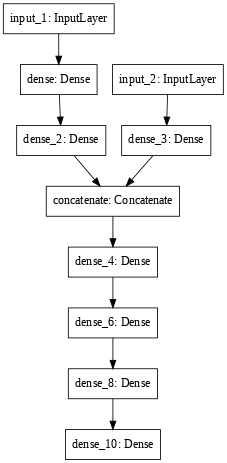

In [ ]:
# Выводим схему модели
терра_ии.схема_модели(нейронка_квартиры_1)

Эпоха №1  Время обучения: 8.15c  Ошибка на обучающей выборке: 2.032млн       Ошибка на проверочной выборке: 1.91млн
Эпоха №2  Время обучения: 4.0c   Ошибка на обучающей выборке: 1.427млн       Ошибка на проверочной выборке: 1.371млн
Эпоха №3  Время обучения: 3.84c  Ошибка на обучающей выборке: 1.199млн       Ошибка на проверочной выборке: 1.266млн
Эпоха №4  Время обучения: 3.82c  Ошибка на обучающей выборке: 1.113млн       Ошибка на проверочной выборке: 1.16млн
Эпоха №5  Время обучения: 3.75c  Ошибка на обучающей выборке: 1.266млн       Ошибка на проверочной выборке: 1.162млн
Эпоха №6  Время обучения: 3.83c  Ошибка на обучающей выборке: 0.959млн       Ошибка на проверочной выборке: 1.08млн
Эпоха №7  Время обучения: 4.67c  Ошибка на обучающей выборке: 0.929млн       Ошибка на проверочной выборке: 1.075млн
Эпоха №8  Время обучения: 3.8c   Ошибка на обучающей выборке: 1.189млн       Ошибка на проверочной выборке: 1.316млн
Эпоха №9  Время обучения: 4.55c  Ошибка на обучающей выборке: 1.105

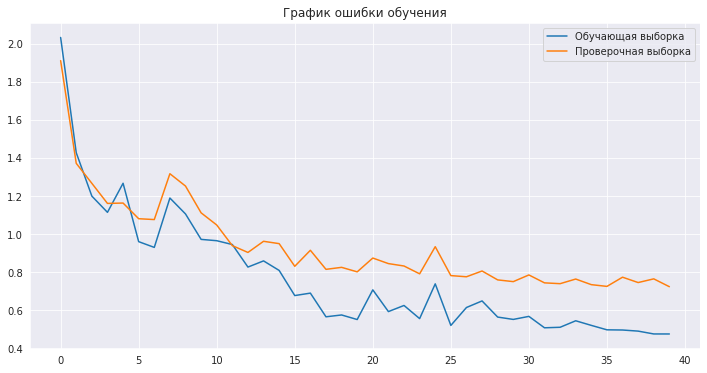

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели_квартиры(
    нейронка_квартиры_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 256,
    количество_эпох = 40,
    инструменты = инструменты)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  4#@param {type:"integer"}
способ_передвижения = "\u043F\u0435\u0448\u043A\u043E\u043C" #@param ['пешком', 'транспорт']
этаж =  1#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 87 #@param {type:"number"}
описание = '\u043F\u0440\u0435\u043A\u0440\u0430\u0441\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430 \u0440\u044F\u0434\u043E\u043C \u0441 \u043F\u0430\u0440\u043A\u043E\u043C' #@param {type:"string"}

In [ ]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка_квартиры_1, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

Цена квартиры: 19млн  351тыс рублей


## Подбор кандидата на должность менеджера по продажам 

In [ ]:
# Скачиваем базу вакансий
терра_ии.загрузить_базу(база = 'ВАКАНСИИ',
                    справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/HR.zip
Вы скачали базу вакансий.


In [ ]:
# Примеры из базы
терра_ии.показать_примеры(
    база = 'Вакансии')

Пример резюме:

Пол:                         М
Возраст:                     22
Город:                       Калининград
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский Украинский Французский
Образование:                 Высшее образование
Дополнительное образование:  ФРИИ
Зарплата:                    60000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           25
Обязанности на пред.работе:  Ведение социальных сетей ВУЗа, Приём и оформление заказов, ведение клиентской базы, управление склад
                             ом, ведение отчетности по дебиторским задолженностям, найм водителей, обзвон ключевых клиентов, закл
                             ючение договоров, оптовые продажи, работа с базой данных, 1С, к

In [ ]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки_вакансии()

In [ ]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-128\
 Полносвязный-2' # Указываем слои создаваемой модели

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

Создана модель нейронной сети!


Схема модели:


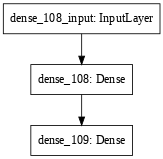

In [ ]:
# Выводим структуру модели
терра_ии.схема_модели(нейронка_вакансии_1)

Эпоха №1    Время обучения: 0.41c   Точность на обучающей выборке: 48.2%     Точность на проверочной выборке: 45.83%
Эпоха №2    Время обучения: 0.04c   Точность на обучающей выборке: 46.6%     Точность на проверочной выборке: 54.17%
Эпоха №3    Время обучения: 0.03c   Точность на обучающей выборке: 51.6%     Точность на проверочной выборке: 59.09%
Эпоха №4    Время обучения: 0.03c   Точность на обучающей выборке: 58.8%     Точность на проверочной выборке: 58.71%
Эпоха №5    Время обучения: 0.04c   Точность на обучающей выборке: 57.6%     Точность на проверочной выборке: 60.61%
Эпоха №6    Время обучения: 0.04c   Точность на обучающей выборке: 60.4%     Точность на проверочной выборке: 61.74%
Эпоха №7    Время обучения: 0.04c   Точность на обучающей выборке: 62.0%     Точность на проверочной выборке: 61.74%
Эпоха №8    Время обучения: 0.03c   Точность на обучающей выборке: 61.8%     Точность на проверочной выборке: 62.5%
Эпоха №9    Время обучения: 0.04c   Точность на обучающей выборке

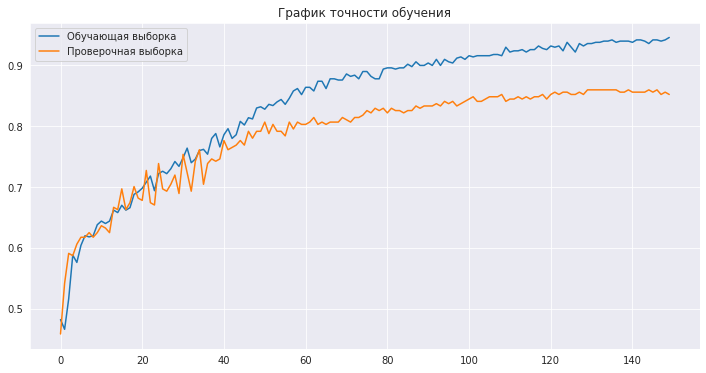

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_вакансии_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 150)

In [ ]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_1,
                              тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         М
Возраст:                     42
Город:                       Москва
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Армянский Немецкий
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    60000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день, сменный график
Опыт работы (мес):           160
Обязанности на пред.работе:  открытие паломнических точек для монастырей; юридическое сопровождение и помощь благотворительному ф
                             онду Александра Невского;аренда и управление собственным нежилым недвижимым имуществом, Юридическое 
                             сопровождение НКО, Руководство,контроль и координац

In [ ]:
# Эксперимент. Многократное обучение и усредненеие результатов

слои = 'Полносвязный-256\
 Полносвязный-2' # Указываем слои создаваемой модели

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_2 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

Создана модель нейронной сети!


Запуск №1   Время обучения: 4.43c Точность на обучающей выборке: 96.4%       Точность на проверочной выборке: 87.5%
Запуск №2   Время обучения: 4.62c Точность на обучающей выборке: 96.8%       Точность на проверочной выборке: 88.26%
Запуск №3   Время обучения: 4.36c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 89.02%
Запуск №4   Время обучения: 4.69c Точность на обучающей выборке: 97.2%       Точность на проверочной выборке: 88.26%
Запуск №5   Время обучения: 4.4c  Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 88.26%
Запуск №6   Время обучения: 4.43c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 88.64%
Запуск №7   Время обучения: 4.33c Точность на обучающей выборке: 96.8%       Точность на проверочной выборке: 88.26%
Запуск №8   Время обучения: 4.92c Точность на обучающей выборке: 97.8%       Точность на проверочной выборке: 88.26%
Запуск №9   Время обучения: 4.64c Точность на обучающей выборке: 

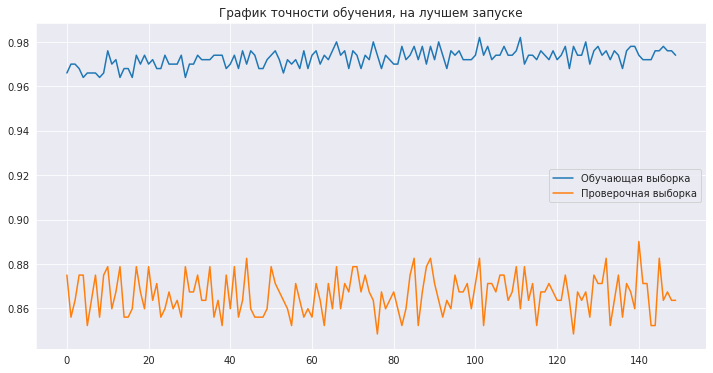

In [ ]:
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_вакансии_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 64,
    количество_эпох = 150, 
    количество_запусков = 10)

In [ ]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_2,
                        тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         Ж
Возраст:                     48
Город:                       Тольятти
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  не готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    30000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      полный день
Опыт работы (мес):           300
Обязанности на пред.работе:  Курирование запуска нового производства и открытие торговых точек.Подбор, мотивация персонала.Поиск 
                             клиентов и продажи.Планирование и анализ деятельности производства и торговых точек.Контроль деятель
                             ности производства и магазинаВедение управленческой отчетности и документооборота

# **Домашнее задание**

In [ ]:
!pip -q install terra_ai
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


## Задание № 1. Подбор кандидата на должность менеджера по продажам.  

Создайте нейросеть, которая будет определять подходит ли кандидат на должность в Университете искусственного интеллекта.  

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [ ]:
# Скачиваем базу вакансий
терра_ии.загрузить_базу(база = 'ВАКАНСИИ',
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/HR.zip
Вы скачали базу вакансий.


In [ ]:
# Примеры из базы
терра_ии.показать_примеры(база = 'Вакансии')

Пример резюме:

Пол:                         М
Возраст:                     35
Город:                       Глазов
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  нет
Зарплата:                    30000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      гибкий график, полный день, сменный график, удаленная работа
Опыт работы (мес):           117
Обязанности на пред.работе:  Холодный поиск клиентов, активные продажи, Контроль производственного процесса, работа с персоналом,
                              контроль складских запасов сырья, работа с ассортиментом, работа с поставщиками над оптимизацией за
                             купочных цен, расчет себестоимости продукц

Обработка базы и создание выборок.

In [ ]:
# Создаем обучающую и проверочную выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_выборки_вакансии()

### Создание сети

Создайте нейронную сеть, которая будет включать в себя полносвязные слои в формате:

```
# Пример, Полносвязный-128 означает, что мы используем Полновязный слой на 128 нейронов.
слои='Полносвязный-128\
 Полносвязный-2'
```
Попробуйте изменить количество нейронов и обучите модель.

In [ ]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-128\
 Полносвязный-2'

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_1 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

Создана модель нейронной сети!


Визуализация структуры.

Схема модели:


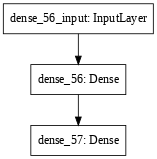

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_вакансии_1)

### Обучение модели.

Эпоха №1    Время обучения: 0.44c   Точность на обучающей выборке: 45.2%     Точность на проверочной выборке: 55.68%
Эпоха №2    Время обучения: 0.04c   Точность на обучающей выборке: 52.6%     Точность на проверочной выборке: 56.82%
Эпоха №3    Время обучения: 0.03c   Точность на обучающей выборке: 55.0%     Точность на проверочной выборке: 55.68%
Эпоха №4    Время обучения: 0.03c   Точность на обучающей выборке: 58.0%     Точность на проверочной выборке: 60.98%
Эпоха №5    Время обучения: 0.03c   Точность на обучающей выборке: 59.8%     Точность на проверочной выборке: 62.5%
Эпоха №6    Время обучения: 0.03c   Точность на обучающей выборке: 61.8%     Точность на проверочной выборке: 65.53%
Эпоха №7    Время обучения: 0.04c   Точность на обучающей выборке: 61.6%     Точность на проверочной выборке: 63.64%
Эпоха №8    Время обучения: 0.03c   Точность на обучающей выборке: 63.0%     Точность на проверочной выборке: 67.8%
Эпоха №9    Время обучения: 0.03c   Точность на обучающей выборке:

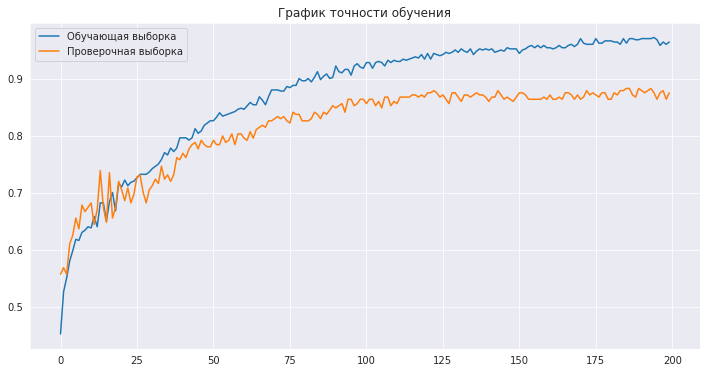

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_вакансии_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 60,
    количество_эпох = 200,
    )

### Тестирование модели.

In [ ]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_1,
                              тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         Ж
Возраст:                     42
Город:                       Москва
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Россия
Разрешение на работу:        Россия
Знания языков:               Русский Английский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    30000.0
Время в пути до работы:      не имеет значения
Занятость:                   частичная занятость, полная занятость
График:                      гибкий график, сменный график, удаленная работа
Опыт работы (мес):           178
Обязанности на пред.работе:  Управление каналами привлечения клиентов; завоевание желаемой определенной доли рынка риэлторских ус
                             луг; управление взаимоотношениями с новыми и постоянными клиентами; обеспечение финансовой стабильно
                             сти и устойчивости

Запуск №1   Время обучения: 3.08c Точность на обучающей выборке: 94.8%       Точность на проверочной выборке: 87.12%
Запуск №2   Время обучения: 3.2c  Точность на обучающей выборке: 96.8%       Точность на проверочной выборке: 88.64%
Запуск №3   Время обучения: 3.1c  Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 88.64%
Запуск №4   Время обучения: 3.06c Точность на обучающей выборке: 97.4%       Точность на проверочной выборке: 88.64%
Запуск №5   Время обучения: 3.0c  Точность на обучающей выборке: 98.0%       Точность на проверочной выборке: 88.64%
Запуск №6   Время обучения: 2.95c Точность на обучающей выборке: 98.0%       Точность на проверочной выборке: 89.02%
Запуск №7   Время обучения: 5.92c Точность на обучающей выборке: 97.0%       Точность на проверочной выборке: 89.39%
Запуск №8   Время обучения: 2.94c Точность на обучающей выборке: 97.6%       Точность на проверочной выборке: 88.64%
Запуск №9   Время обучения: 3.01c Точность на обучающей выборке:

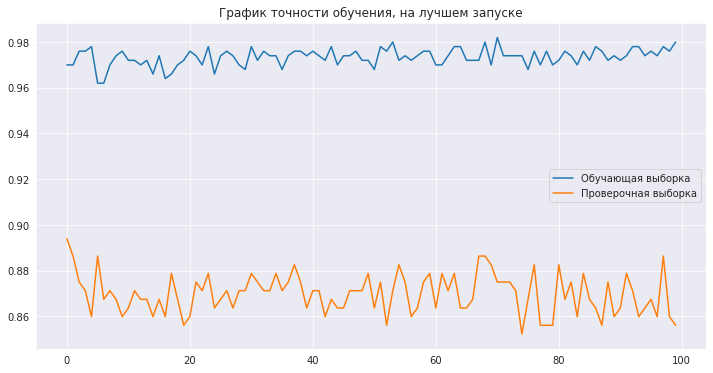

In [ ]:
# Указываем слои создаваемой модели
слои = 'Полносвязный-256\
 Полносвязный-2'

# Получаем входной размер данных
входной_размер = терра_ии.получить_входной_размер(обучающая_выборка)

# Создаем модель
нейронка_вакансии_2 = терра_ии.создать_сеть(
    слои = слои,
    входной_размер = входной_размер,
    задача='классификация вакансий'
    )

эксперимент_2 = терра_ии.обучение_модели(
    нейронка_вакансии_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 60,
    количество_эпох = 100, 
    количество_запусков = 20)

In [ ]:
терра_ии.тест_модели_вакансии(нейронка_вакансии_2, тестовая_выборка, метки_тестовой_выборки)

Тестовое резюме:

Пол:                         М
Возраст:                     20
Город:                       Алматы
Готовность к переезду:       не готов к переезду
Готовность к командировкам:  готов к командировкам
Гражданство:                 Казахстан
Разрешение на работу:        Казахстан
Знания языков:               Казахский Русский
Образование:                 Высшее образование
Дополнительное образование:  Данные не указаны
Зарплата:                    90000.0
Время в пути до работы:      не имеет значения
Занятость:                   полная занятость
График:                      гибкий график, полный день, удаленная работа
Опыт работы (мес):           28
Обязанности на пред.работе:  Продажа юридических услуг, Инвентаризация теле2 вышек,и БС, Подключение домашнего интернета, Call ce
                             ntre, Продавец-консультант бытовой техники, Продавец-консультант GSM

Модель уверена, что кандидат подходит в УИИ на: 0.03%
--------------------------------------------

## Задание № 2. Классификация отзывов автомобиля Тесла.  

Создайте нейросеть, которая будет распознавать эмоциональную окраску отзывов из базы Tesla.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.  

Постарайтесь воспроизвести все этапы по памяти.

### Работа с базой.

In [ ]:
# Загружаем базу отзывов Tesla
терра_ии.загрузить_базу(база = 'TESLA', 
                        справка = 'Показать')

Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/tesla.zip
Вы скачали базу отзывов владельцев автомобилями Tesla


In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'TESLA')

В данной базе находятся положительные и негативные отзывы об автомобилях Tesla:
['Негативный отзыв', 'Позитивный отзыв']

Пример отзыва:
Тип отзыва:  Позитивный отзыв
Отзывы:
     *  Водитель наслаждается от такого авто и вождения  Красивая машина нужно брать  Тесла топ, тащусь от 


Обработка базы и создание выборок.

In [ ]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = '10000'
размер_окна = '70'
шаг = '10'
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг, 
    путь_к_базе = '/content/Отзывы/')

Формирование выборки завершено


### Создание сети.

Создайте сеть, состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный

Визуализация структуры.

In [ ]:
# Эксперимент № 1
# Уменьшенный размер эмбеддинг-пространства. Слабая нейронка (меньше слоев, меньше нейронов)
ветвь1 = 'Эмбеддинг-2-'+ количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-2'
ветвь2 = 'Полносвязный-4 Полносвязный-2'
ветвь3 = 'Полносвязный-2'
нейронка_tesla_1 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

Схема модели:


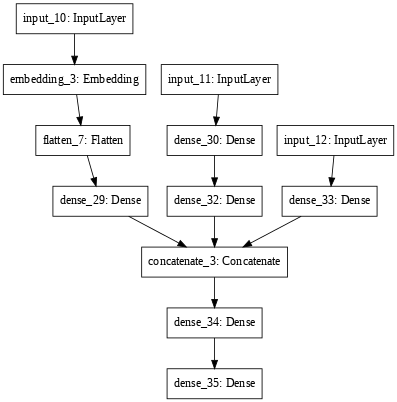

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_tesla_1)

### Обучение модели.

Эпоха №1    Время обучения: 2.14c   Точность на обучающей выборке: 57.79%    Точность на проверочной выборке: 78.57%
Эпоха №2    Время обучения: 1.43c   Точность на обучающей выборке: 95.94%    Точность на проверочной выборке: 92.86%
Эпоха №3    Время обучения: 1.41c   Точность на обучающей выборке: 99.95%    Точность на проверочной выборке: 96.43%
Эпоха №4    Время обучения: 1.44c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №5    Время обучения: 1.42c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №6    Время обучения: 1.45c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №7    Время обучения: 1.43c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №8    Время обучения: 1.46c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №9    Время обучения: 1.43c   Точность на обучающей выборк

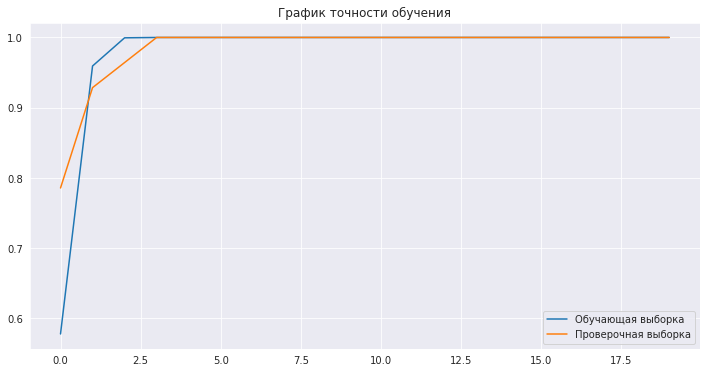

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_tesla_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 18,
    количество_эпох = 20)

Эпоха №1    Время обучения: 5.29c   Точность на обучающей выборке: 92.44%    Точность на проверочной выборке: 100.0%
Эпоха №2    Время обучения: 4.77c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №3    Время обучения: 4.67c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №4    Время обучения: 4.6c    Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №5    Время обучения: 4.82c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №6    Время обучения: 4.65c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №7    Время обучения: 4.63c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №8    Время обучения: 4.69c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 100.0%
Эпоха №9    Время обучения: 4.93c   Точность на обучающей выборк

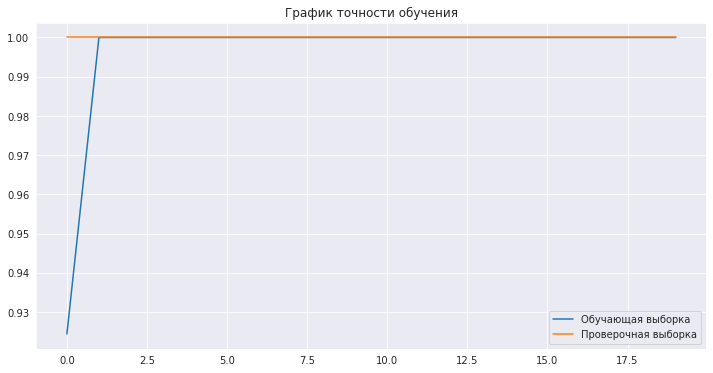

In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-64'
ветвь2 = 'Полносвязный-1024 Полносвязный-256 Полносвязный-64'
ветвь3 = 'Полносвязный-32'
нейронка_tesla_2 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

# Обучаем модель
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_tesla_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 18,
    количество_эпох = 20)

Эпоха №1    Время обучения: 19.5c   Точность на обучающей выборке: 96.46%    Точность на проверочной выборке: 96.43%
Эпоха №2    Время обучения: 18.11c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №3    Время обучения: 18.14c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №4    Время обучения: 18.36c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №5    Время обучения: 17.98c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №6    Время обучения: 18.03c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №7    Время обучения: 18.0c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №8    Время обучения: 18.18c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 96.43%
Эпоха №9    Время обучения: 17.94c  Точность на обучающей выборк

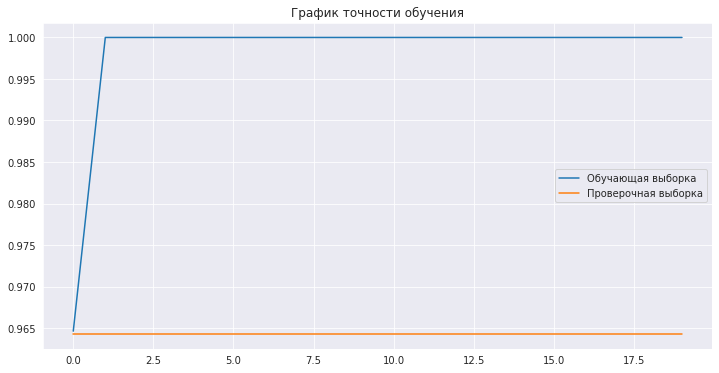

In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-400-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-300'
ветвь2 = 'Полносвязный-4096 Полносвязный-1024 Полносвязный-256'
ветвь3 = 'Полносвязный-256'

нейронка_tesla_3 = терра_ии.создать_составную_сеть(обучающая_выборка, метки_обучающей_выборки, ветвь1, ветвь2, ветвь3)

# Обучаем модель
эксперимент_3 = терра_ии.обучение_модели(
    нейронка_tesla_3,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 18,
    количество_эпох = 20)

### Тестирование модели.

Придумайте и напишите свой отзыв.

In [ ]:
# Демонстрация результата работы нейронной сети
отзыв = 'Очень слабый двигатель при высокой проходимости'
терра_ии.тест_модели_симптомы(нейронка_tesla_3, размер_окна, шаг,
                              отзыв, классы = ['Негативный отзыв', 'Позитивный отзыв'])

Негативный отзыв   -  74.34 %
Позитивный отзыв   -  25.66 %

Нейросеть думает, что это: Негативный отзыв - 74.34%


## Задание № 3. Определение заболевания по симптомам.  

Создайте нейросеть, которая будет определять заболевание по симптомам.

1. Загрузите базу;  
2. Покажите примеры из загруженной базы;  
3. Сделайте предобработку данных для обучающей и тестовой выборки;  
4. Создайте полносвязную модель;  
5. Продемонстрируйте схему созданной модели;  
6. Обучите свою модель;  
7. Проведите тестирование модели.

### Работа с базой.

In [ ]:
# Загрузите базу симптомов заболеваний
терра_ии.загрузить_базу(база = 'СИМПТОМЫ ЗАБОЛЕВАНИЙ',
                        справка = 'Показать')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/terra_ai/DataSets/symptoms.zip
Загружена база симптомов заболеваний



In [ ]:
# Покажите примеры из базы "симптомы"
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холецистит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Колит
Симптомы:
     * постоянные позывы на дефекацию, урчание, вздутие живота, профузный понос, иногда с кровью и слизью, 


In [ ]:
# Задаем параметры для формирования выборок
количество_анализируемых_слов = '10000'
размер_окна = '50'
шаг = '15'

# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна, 
    шаг)

Формирование выборки завершено


### Создание сети.
Состоящую из 3-х ветвей, в которую будут входить слои рассмотренные на вебинаре, такие как:

*   Эмбеддинг
*   Выравнивающий
*   Полносвязный



In [ ]:
# Эксперимент 1
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-2-'+ количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-2'
ветвь2 = 'Полносвязный-4 Полносвязный-2'
ветвь3 = 'Полносвязный-2'
нейронка_симптомы_1 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Визуализация модели.

Схема модели:


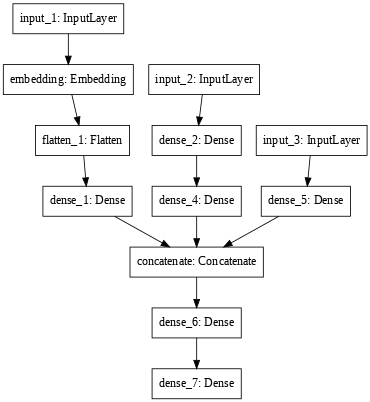

In [ ]:
# Покажите структуру сети, с помощью функции из terra_ai. терра_ии.схема_модели(внутри функции указывается нейросеть, которую вы создали)
терра_ии.схема_модели(нейронка_симптомы_1)

### Обучение нейронной сети.
Используя свою модель, примените функцию из terra ai:
*   терра_ии.обучение_модели()




Эпоха №1    Время обучения: 6.63c   Точность на обучающей выборке: 46.81%    Точность на проверочной выборке: 27.78%
Эпоха №2    Время обучения: 5.65c   Точность на обучающей выборке: 88.74%    Точность на проверочной выборке: 44.44%
Эпоха №3    Время обучения: 5.63c   Точность на обучающей выборке: 99.63%    Точность на проверочной выборке: 41.11%
Эпоха №4    Время обучения: 5.61c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 44.44%
Эпоха №5    Время обучения: 5.62c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 46.67%
Эпоха №6    Время обучения: 5.66c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 47.78%
Эпоха №7    Время обучения: 5.63c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 48.89%
Эпоха №8    Время обучения: 5.64c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 48.89%
Эпоха №9    Время обучения: 5.55c   Точность на обучающей выборк

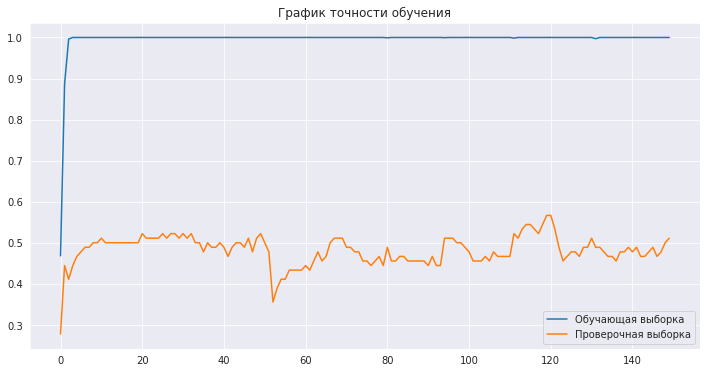

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка_симптомы_1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 150)

In [ ]:
# Эксперимент 2
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-64'
ветвь2 = 'Полносвязный-1024 Полносвязный-256 Полносвязный-64'
ветвь3 = 'Полносвязный-32'
нейронка_симптомы_2 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 12.83c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №2    Время обучения: 13.23c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №3    Время обучения: 12.98c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №4    Время обучения: 13.16c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №5    Время обучения: 13.07c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №6    Время обучения: 13.26c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №7    Время обучения: 13.6c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №8    Время обучения: 13.03c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 80.91%
Эпоха №9    Время обучения: 13.06c  Точность на обучающей выборк

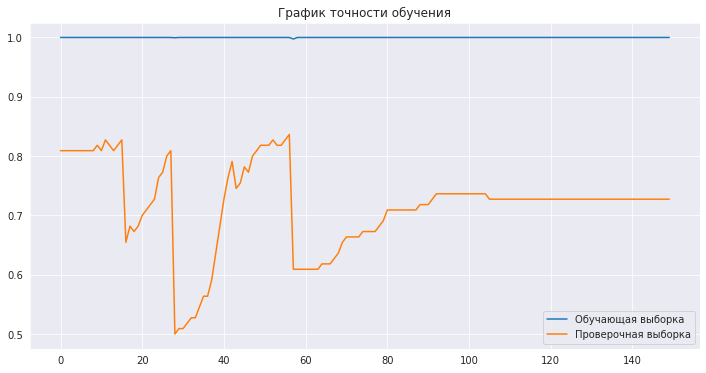

In [ ]:
# Обучаем модель
эксперимент_2 = терра_ии.обучение_модели(
    нейронка_симптомы_2,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 150)

In [ ]:
# Эксперимент 3
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-300-' + количество_анализируемых_слов + '-' + размер_окна + ' Выравнивающий Полносвязный-200'
ветвь2 = 'Полносвязный-4096 Полносвязный-1024 Полносвязный-256'
ветвь3 = 'Полносвязный-256'
нейронка_симптомы_3 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)

Эпоха №1    Время обучения: 35.72c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 75.45%
Эпоха №2    Время обучения: 35.58c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 75.45%
Эпоха №3    Время обучения: 34.86c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 77.27%
Эпоха №4    Время обучения: 35.5c   Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 77.27%
Эпоха №5    Время обучения: 35.42c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 76.36%
Эпоха №6    Время обучения: 35.81c  Точность на обучающей выборке: 99.76%    Точность на проверочной выборке: 63.64%
Эпоха №7    Время обучения: 36.37c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 63.64%
Эпоха №8    Время обучения: 36.87c  Точность на обучающей выборке: 100.0%    Точность на проверочной выборке: 64.55%
Эпоха №9    Время обучения: 35.79c  Точность на обучающей выборк

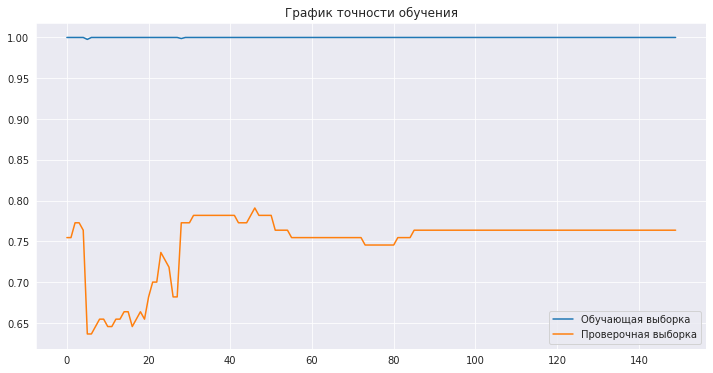

In [ ]:
# Обучаем модель
эксперимент_3 = терра_ии.обучение_модели(
    нейронка_симптомы_3,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 32,
    количество_эпох = 150)

### Продемонстрируйте работу нейронной сети
Используя обученую модель для симптомов указанных в ячейке, примените функцию из terra ai:
*   терра_ии.тест_модели_симптомы()  

Можете создать другой перечень симптомов и посмотреть насколько успешно модель справляется.

In [ ]:
# Демонстрация результата работы нейронной сети
симптомы = 'общая слабость;повышение температуры тела;систематические приступы тошноты;рвота;увеличенная потливость;изжога.'
терра_ии.тест_модели_симптомы(нейронка_симптомы_3, размер_окна, шаг,
                              симптомы, классы=['Колит', 'Гепатит', 'Гастрит', 'Холицестит', 'Дуоденит', 'Энтерит', 'Язва', 'Эзофагит', 'Аппендицит', 'Панкреатит'])

Колит          -  2.21 %
Гепатит        -  14.41 %
Гастрит        -  10.36 %
Холицестит     -  1.27 %
Дуоденит       -  5.36 %
Энтерит        -  15.91 %
Язва           -  3.36 %
Эзофагит       -  9.38 %
Аппендицит     -  34.49 %
Панкреатит     -  3.24 %

Нейросеть думает, что это: Аппендицит - 34.49%
